In [1]:
!pip3 install pandas
!pip3 install matplotlib
!pip3 install numpy
!pip install plotly express
!pip install scikit-learn
!pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


## Install dependences

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
#CHANGE THIS VALUES
MINOR_FORCE_WITH_LOG = 2
MAX_FORCE_WITH_LOG = 7

### function to get module


In [2]:
def getModule(x,y):
    return np.sqrt(x**2 + y**2)

### The format of input dataframe is PosX, PosY, vel. This function transform in a dataframe Module(PosX, PosY), vel

In [3]:
def getDf(df, first):
    dfplot = pd.DataFrame(columns=['posicao', 'velocidade'])
    for i in range(len(df)):
        x = df.iloc[i][0] - first[0]
        y = df.iloc[i][1] - first[1]
        v = df.iloc[i][2] 
        module = getModule(x,y)
        dfplot.loc[i] = [module/1000, v]
    return dfplot

### This function get a new df equals "getDf", but has a filter to remove duplicates and get only points after max vel, to remove the vel in adjust angle of robot

In [4]:
def getDftoIntercept(dfregressao):
    dfregressao1 = pd.DataFrame(columns=['posicao', 'velocidade'])
    start = dfregressao.iloc[0]
    dfregressao.drop(0, axis=0, inplace= True)
    dfregressao1 = getDf(dfregressao, start)
    max = dfregressao1.max(axis=0)[1]
    index = dfregressao1[dfregressao1['velocidade'] == max].index[0]
    dfregressao1 = dfregressao1.iloc[index:]
    #return dfregressao1
    return dfregressao1.drop_duplicates(subset=['posicao'], keep='first', inplace=False)
    

### interative plot for any CSV

In [ ]:
df = pd.read_csv('path para o arquivo', header= None)
df = getDftoIntercept(df)
#df.drop_duplicates(subset=['posicao'], keep='first', inplace=True)
fig = px.line(df,x='posicao',y='velocidade')
fig.show()

In [231]:
print(df.iloc[65])

posicao       4.155142
velocidade    0.816373
Name: 222, dtype: float64


### This Pair are: 
### To Start: (first position with point in a Reta1, Last Position with point in a Reta1)
### To Stop: (First position with point in a Reta2, Last Position with point in a Reta2)

In [13]:
start = [(0,7),(5,11),(0, 14), (3, 20), (10, 17), (10,20), (7, 25), (13,30)]
stop = [(10,40),(80, 120),(100, 200), (21, 150), (40, 100), (45, 81), (45, 60), (38,50)]

### getAlpha in a straight
### getBeta in a straight
### get Y in a straight equation

In [6]:
def getA(x,y,x2,y2):
    return (y2-y)/(x2-x)
def getB(a,x,y):
    return y - a*x
def reta(a,b,x):
    return a*x + b

In [7]:
def getRegressao(a, b, r):
    dfreta = pd.DataFrame(columns=['posicao', 'velocidade'])
    for i in range(r):
        y = reta(a,b,i)
        dfreta.loc[i] = [i, y]
    return dfreta


### Get interception of two straights

In [8]:
def getInterception(a,b,a1,b1):
    x = (b-b1)/(a1-a)
    y = reta(a,b,x)
    return(x,y)

### For all csv in a range, append the force and a df with (module, vel) collums

In [240]:
dfprecision = []
forcas = []
for i in range(MINOR_FORCE_WITH_LOG,MAX_FORCE_WITH_LOG +1):
    dataframe = pd.read_csv('/home/jp/Documents/ssl-unification/bin/csvs/'+str(i)+'.csv', header= None)
    dfprecision.append(getDftoIntercept(dataframe))
    forcas.append(i)

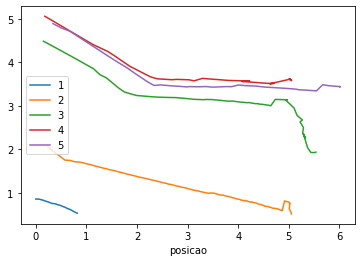

In [241]:
ax = plt.subplot()
for i in range(len(dfprecision)):
    ax = dfprecision[i].plot(ax = ax, x = 'posicao',y = 'velocidade', kind = 'line', label = str(forcas[i]))
    

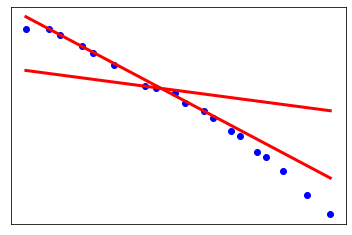

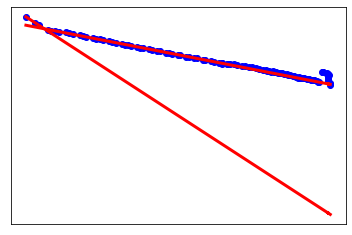

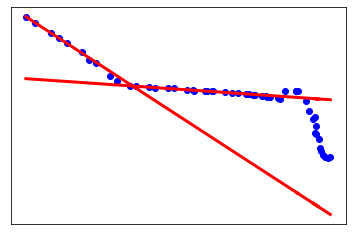

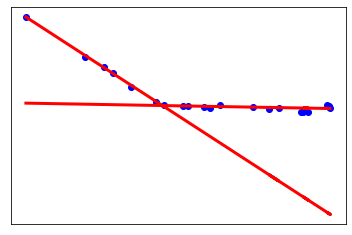

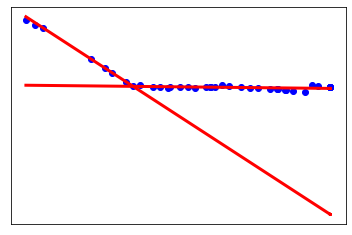

In [242]:
angular1 = []
angular2 = []
linear1 = []
linear2 = []
count = 0
for i in dfprecision:
    # get points using slice
    points1 = i.iloc[start[count][0]:start[count][1]]
    points2 = i.iloc[stop[count][0]: stop[count][1]]
    # declare a linear regression object
    reg = linear_model.LinearRegression()
    reg2 = linear_model.LinearRegression()
    # train using only the points in the slice
    reg.fit(points1[['posicao']], points1[['velocidade']])
    reg2.fit(points2[['posicao']], points2[['velocidade']])
    # append the coefficients
    angular1.append(reg.coef_)
    angular2.append(reg2.coef_)
    linear1.append(reg.intercept_)
    linear2.append(reg2.intercept_)
    # plot graphs
    plt.scatter(i['posicao'], i['velocidade'], color='blue')
    plt.plot(i['posicao'], reg.predict(i[['posicao']]), color='red', linewidth=3)
    plt.plot(i['posicao'], reg2.predict(i[['posicao']]), color='red', linewidth=3)
    plt.xticks(())
    plt.yticks(())
    plt.show()
    count += 1

In [243]:
interceptions = pd.DataFrame(columns=['dist', 'vel'])
retas1 = []
retas2 = []
# get interception points and straight lines
for i in range(len(angular1)):
    point = (getInterception(float(angular1[i]), float(linear1[i]), float(angular2[i]), float(linear2[i])))
    interceptions.loc[i] = [point[0], point[1]]
    retas1.append(getRegressao(float(angular1[i]), float(linear1[i]), 8))
    retas2.append(getRegressao(float(angular2[i]), float(linear2[i]), 8))


    


### Straight 1 and projection

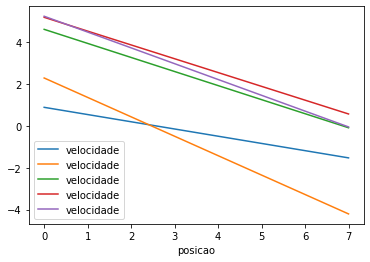

In [244]:
ax = plt.subplot()
for i in retas1:
    ax = i.plot(ax = ax, x = 'posicao',y = 'velocidade', kind = 'line')

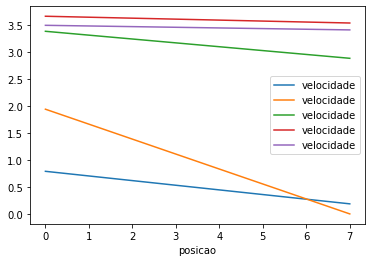

In [245]:
ax = plt.subplot()
for i in retas2:
    ax = i.plot(ax = ax, x = 'posicao',y = 'velocidade', kind = 'line')

<AxesSubplot:xlabel='dist', ylabel='vel'>

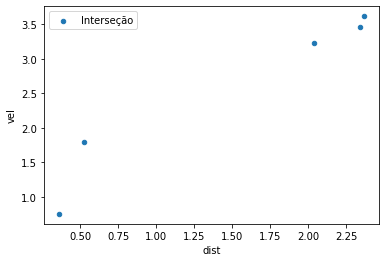

In [246]:
interceptions.plot(x = 'dist',y = 'vel', kind = 'scatter', label = 'Interseção')

In [18]:
len(forcas)

3

In [247]:
# train using angular coefficients to get a general value
reta1a = pd.DataFrame(columns=['forca', 'angular'])
reta2a = pd.DataFrame(columns=['forca', 'angular'])
for i in range(len(forcas)):
    reta1a.loc[i] = [forcas[i], angular1[i]]
for i in range(len(forcas)):
    reta2a.loc[i] = [forcas[i], angular2[i]]
rega1 = linear_model.LinearRegression()
rega2 = linear_model.LinearRegression()
rega1.fit(reta1a[['forca']], reta1a[['angular']])
rega2.fit(reta2a[['forca']], reta2a[['angular']])

LinearRegression()

In [248]:
# train using linear coefficients to get a general value
reta1b = pd.DataFrame(columns=['forca', 'linear'])
reta2b = pd.DataFrame(columns=['forca', 'linear'])
for i in range(len(forcas)):
    reta1b.loc[i] = [forcas[i], linear1[i]]
for i in range(len(forcas)):
    reta2b.loc[i] = [forcas[i], linear2[i]]
regb1 = linear_model.LinearRegression()
regb2 = linear_model.LinearRegression()
regb1.fit(reta1b[['forca']], reta1b[['linear']])
regb2.fit(reta2b[['forca']], reta2b[['linear']])


LinearRegression()

In [8]:
# predict beta1
def predictb1(x):
    return float(regb1.coef_*x + regb1.intercept_)
# predict beta2
def predictb2(x):
    return float(regb2.coef_*x + regb2.intercept_)
# predict alpha1
def predicta1(x):
    return float(rega1.coef_*x + rega1.intercept_)
# predict alpha2
def predicta2(x):
    return float(rega2.coef_*x + rega2.intercept_)

In [9]:
# get reta1
def reta1(x, f):
    return predicta1(f)*x +predictb1(f)
#get reta2
def reta2(x,f):
    return predicta2(f)*x +predictb2(f)

In [10]:
# get a speed in a position using initial force
def speed(x, f):
    x_intersection = getInterception(predicta1(f), predictb1(f), predicta2(f), predictb2(f))[0]
    if(x < x_intersection):
        return reta1(x, f)
    if(x > x_intersection):
        return reta2(x, f)

In [249]:
#predict of our model to all forces

predforcas = [1,2,3,4,5]
estimated = []
for i in predforcas:
    testFunction = pd.DataFrame(columns=['posicao', 'velocidade predita'])
    for j in range(len(dfprecision[2])):
        testFunction.loc[j] = [dfprecision[2]['posicao'].iloc[j], float(speed(dfprecision[2]['posicao'].iloc[j], i))]
    estimated.append(testFunction)


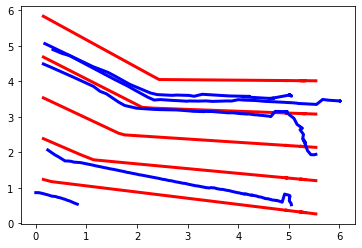

In [250]:
# red predict, blue real log
ax = plt.subplot()
for i in estimated:
    plt.plot(i['posicao'], i['velocidade predita'], color='red', linewidth=3)
for i in dfprecision:
    plt.plot(i['posicao'],i['velocidade'], color = 'blue', linewidth=3)
plt.show()

<AxesSubplot:xlabel='posicao'>

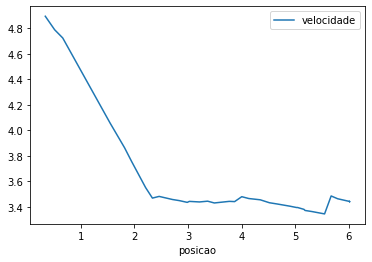

In [287]:
df55 = pd.read_csv('/home/jp/Documents/ssl-unification/bin/csvs/5.csv', header= None)
#df55 = pd.read_csv('/home/jp/Documents/ssl-unification/bin/output.csv', header= None)
df55 = getDftoIntercept(df55)
df55.plot(x = 0, y = 1, kind = 'line')


<AxesSubplot:xlabel='posicao'>

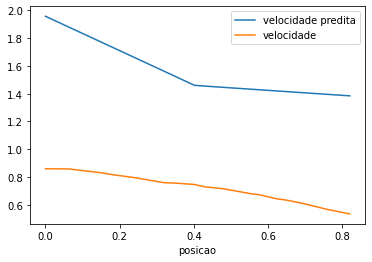

In [258]:
# compare the model with the real data
predictdf55 = pd.DataFrame(columns=['posicao', 'velocidade predita'])
for i in range(len(df55)):
    predictdf55.loc[i] = [df55.iloc[i][0], float(speed(df55.iloc[i][0], 5))]
ax = predictdf55.plot(x = 'posicao', y = 'velocidade predita', kind = 'line')
df55.plot(ax = ax, x = 0, y = 1, kind = 'line')

In [172]:
# get the intercept straight
intercptCoeficients = linear_model.LinearRegression()
intercptCoeficients.fit(interceptions[['dist']], interceptions[['vel']])

LinearRegression()

In [ ]:
print("alpha1 " + str(rega2.coef_))
print("beta1 " + str(rega2.intercept_))
print("alpha2 " +str(regb2.coef_))
print("beta2 " + str(regb2.intercept_))

print("intercept_alpha " + str(intercptCoeficients.coef_))
print("intercept_beta "  + str(intercptCoeficients.intercept_))

In [47]:
# General Form to get a force in a position and speed
#Force = (vel - (Beta1*Position) - Beta2) / Alpha1*Position + Alpha2

In [ ]:
#
# intercept alpha = 0.65133482
# intercept beta = 1.21503451
# alpha1 = 0.03190338
# beta1 = -0.21140871
# alpha2 = 0.88463853
# beta2 = 0.64703287
#
# (dist, vel - 0.2)
# idealforcetorecept = 4.3
# return force - (dist*0.15)

In [175]:
alpha1 = rega2.coef_
beta1 = rega2.intercept_
alpha2 = regb2.coef_ 
beta2 = regb2.intercept_

#intercept
intercept_alpha = intercptCoeficients.coef_
intercept_beta = intercptCoeficients.intercept_

def getPassParameters(dist, vel):
  interception = (vel - intercept_beta) / intercept_alpha
  if interception >= dist:
      return getPassParameters(dist, vel - 0.2)
  else:
      return vel  
def getPassForce(dist):
  idealforcetorecept = 4.3
  idealforcetorecept = getPassParameters(dist, idealforcetorecept)
  force = ((idealforcetorecept - (beta1 * dist) - beta2) / ((alpha1 * dist) + alpha2))
  return force -(dist*0.15)

In [ ]:
force = pd.DataFrame(columns=['dist', 'force'])
count = 0
for i in range(0,7):
    force.loc[count] = [i, getPassForce(i)]
    count+=1

### interative plot to check behavior

In [177]:
fig = px.line(force,x='dist',y='force')
fig.show()

In [179]:
## check values force to pass
a = 0
for i in range(15):
    print("dist: " + str(a) +" -> " + str(getPassForce(a)))
    a += 0.5

dist: 0 -> 0.5120364020319093
dist: 0.5 -> 0.3644924447436231
dist: 1.0 -> 1.0295068465554365
dist: 1.5 -> 1.6648890190774468
dist: 2.0 -> 2.013618122612004
dist: 2.5 -> 2.536790739224419
dist: 3.0 -> 3.0324101408736523
dist: 3.5 -> 3.3054967269107465
dist: 4.0 -> 3.763914250037822
dist: 4.5 -> 4.011203969166655
dist: 5.0 -> 4.4408329130654405
dist: 5.5 -> 4.6676921411660555
dist: 6.0 -> 5.072816877685336
dist: 6.5 -> 5.465444864875735
dist: 7.0 -> 5.665743873895191
